# Comparación de kernels SVM (lineal, polinómico y RBF)
Notebook de práctica 

**Dataset:** `dataset_svm_3features.csv` (x1, x2, x3, y)


## 1. Importaciones y configuración
Importamos librerías que nos harán falta

In [1]:
# Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Carga del dataset

Asegúrate de que el Dataset es correcto y está en la ruta adecuada

In [2]:
# Cargando el dataset
dataset = pd.read_csv("dataset_svm_3.csv")

## 3. Exploración del Dataset

Estudia las características más importantes del Dataset: Estructura, tipos, entre otras

In [3]:
# Visualizando el dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1200 non-null   float64
 1   x2      1200 non-null   float64
 2   x3      1200 non-null   float64
 3   y       1200 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 37.6 KB


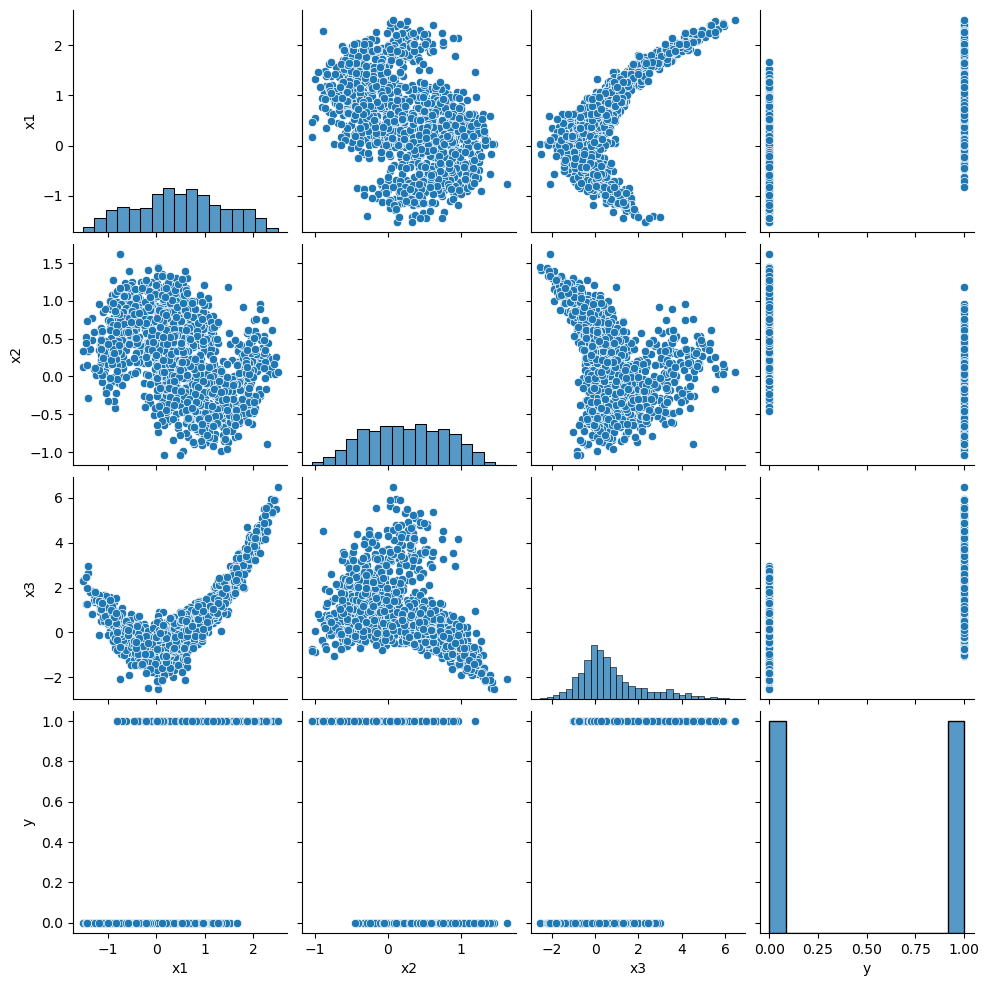

In [4]:
# Vamos a representar los datos para ver la relacion entre X1, X2, X3 y la variable objetivo Y
sns.pairplot(dataset)
plt.show()

In [5]:
# Vamos a ver la correlacion entre las variables
dataset.corr(numeric_only=True).abs()

,x1,x2,x3,y
x1,1.000000,0.391920,0.661239,0.548896
x2,0.391920,1.000000,0.411702,0.697840
x3,0.661239,0.411702,1.000000,0.456067
y,0.548896,0.697840,0.456067,1.000000


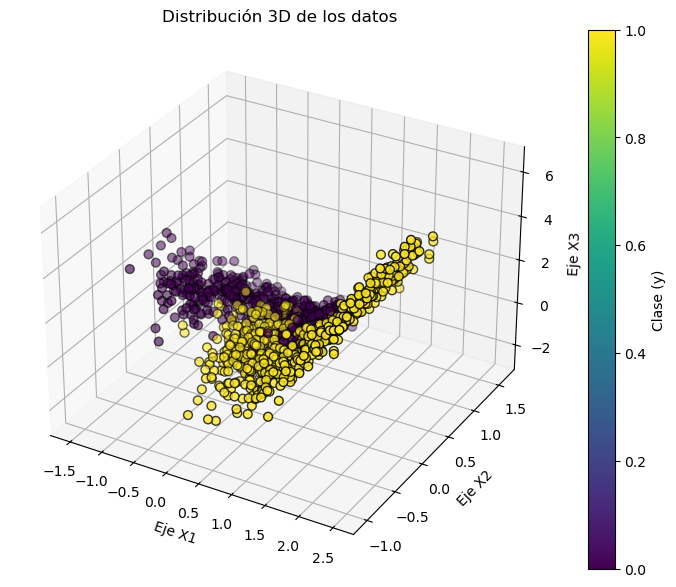

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la figura y el subgráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Mapeo de colores basado en la variable objetivo 'y'
# Suponiendo que tu dataframe se llama 'df'
scatter = ax.scatter(dataset['x1'], dataset['x2'], dataset['x3'], 
                     c=dataset['y'], cmap='viridis', s=40, edgecolors='k')

# Etiquetas de los ejes
ax.set_xlabel('Eje X1')
ax.set_ylabel('Eje X2')
ax.set_zlabel('Eje X3')
ax.set_title('Distribución 3D de los datos')

# Añadir una barra de colores para identificar las clases
plt.colorbar(scatter, label='Clase (y)')

plt.show()

## 4. Preparación de datos


1) Separar `X` e `y`

2) Dividir en train/test

3) Escalar con `StandardScaler`

In [7]:
# Separando X e Y
X = dataset.drop('y', axis=1)
y = dataset['y']

# Escalar con StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividiendo el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 5. Entrenamiento y evaluación

Entrenamos los modelos elegidos con parámetros iniciales razonables

In [8]:
# Ahora entrenamos el modelo SVC con kernel RBF
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state=42, C=20, gamma=0.1)
model.fit(X_train, y_train)

SVC(C=20, gamma=0.1, random_state=42)

### Función de evaluación
Cómo evaluamos

In [9]:
# Fase de evaluación del modelo
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Precisión del modelo SVM:", accuracy)

Precisión del modelo SVM: 0.925


### Evaluación detallada de los modelos elegidos

In [10]:
# Evaluación con matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Ver la precisión
print("Precisión del modelo SVM:", model.score(X_test, y_test))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       114
           1       0.90      0.96      0.93       126

    accuracy                           0.93       240
   macro avg       0.93      0.92      0.92       240
weighted avg       0.93      0.93      0.92       240

Precisión del modelo SVM: 0.925


## 6. Ajuste de hiperparámetros



### 6.1 modelo 1: Ajuste de Hiperparámetros

In [11]:
# Importando el modelo SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Definimos el modelo 1: Kernel Polinómico de grado 3
# Usamos un valor de C estándar y degree=3 para evitar sobreajuste
modelo1 = SVC(kernel='poly', degree=3, C=5, coef0=0.5, random_state=42)

# Entrenamiento del modelo
modelo1.fit(X_train, y_train)

# Predicciones
y_pred1 = modelo1.predict(X_test)

# Evaluación del modelo 1
print("Métricas Modelo 1 (Polinómico Grado 3):")
print(classification_report(y_test, y_pred1))
print("Precisión:", modelo1.score(X_test, y_test))

Métricas Modelo 1 (Polinómico Grado 3):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       114
           1       0.92      0.95      0.94       126

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.93      0.93      0.93       240

Precisión: 0.9333333333333333


### 6.2 modelo 2: Ajuste de Hiperparámetros

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Definimos el modelo 1: Kernel Lineal
modelo_lineal = SVC(kernel='linear', C=10, gamma=0.1, random_state=42)

# Entrenamiento
modelo_lineal.fit(X_train, y_train)

# Predicciones
y_pred_lin = modelo_lineal.predict(X_test)

# Evaluación
print("Métricas Modelo Lineal:")
print(classification_report(y_test, y_pred_lin))
print("Precisión:", modelo_lineal.score(X_test, y_test))

Métricas Modelo Lineal:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       114
           1       0.87      0.86      0.86       126

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240

Precisión: 0.8583333333333333


## 7. Comparación final
Comparación de Métricas de cada modelo

Accuracy Lineal: 0.8583
Accuracy Polinómico G5: 0.9333
Accuracy RBF: 0.9250


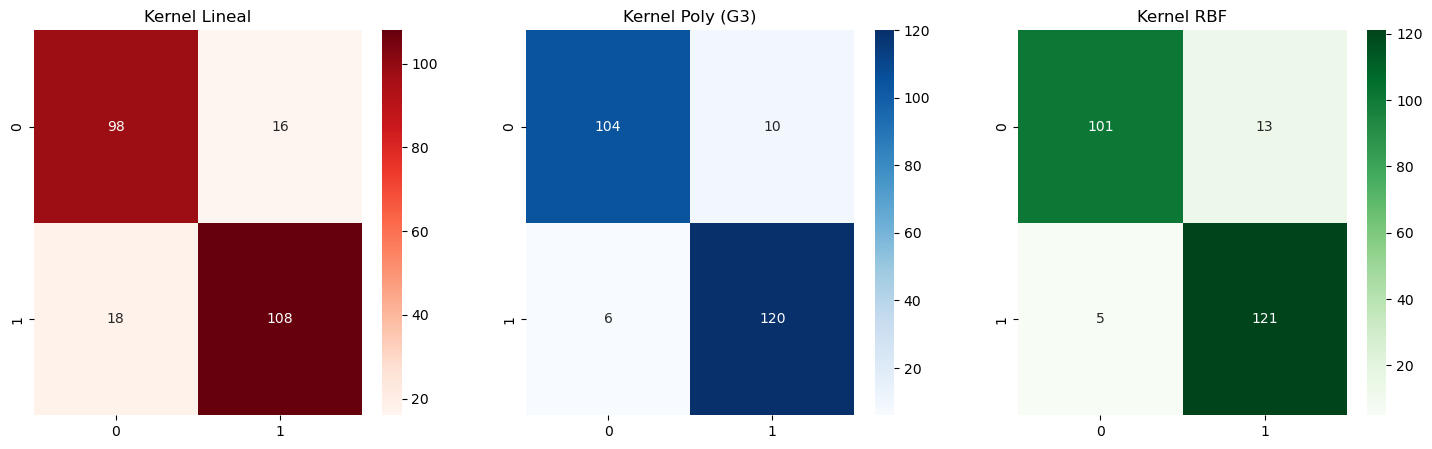

In [13]:
# Comparativa rápida de Accuracy
print(f"Accuracy Lineal: {modelo_lineal.score(X_test, y_test):.4f}")
print(f"Accuracy Polinómico G5: {modelo1.score(X_test, y_test):.4f}")
print(f"Accuracy RBF: {model.score(X_test, y_test):.4f}")

# Visualización de Matrices de Confusión
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_lin), annot=True, fmt='d', ax=ax[0], cmap='Reds')
ax[0].set_title('Kernel Lineal')

sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Kernel Poly (G3)')

# Para este mapa usamos las predicciones que hayas sacado de tu RBF arriba
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=ax[2], cmap='Greens')
ax[2].set_title('Kernel RBF')

plt.show()

#### Representando y real, y_pred del kernel RBF

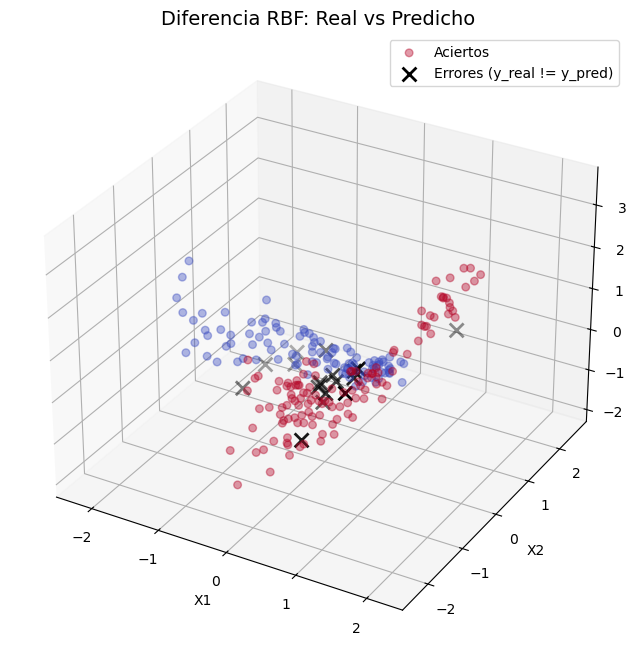

Total de muestras test: 240
Número de errores: 18


In [14]:
from mpl_toolkits.mplot3d import Axes3D

# 1. Identificar aciertos y errores
# Suponiendo que 'model' es tu SVC con RBF y 'y_pred' son sus resultados
y_pred_rbf = model.predict(X_test)
correctos = (y_test == y_pred_rbf)
errores = (y_test != y_pred_rbf)

# 2. Configurar el gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# ACIERTOS: Puntos pequeños y algo transparentes para no saturar
ax.scatter(X_test[correctos, 0], X_test[correctos, 1], X_test[correctos, 2], 
           c=y_test[correctos], cmap='coolwarm', s=30, alpha=0.4, label='Aciertos')

# ERRORES: Puntos grandes, con forma de 'X' y color negro para que destaquen
ax.scatter(X_test[errores, 0], X_test[errores, 1], X_test[errores, 2], 
           c='black', marker='x', s=100, linewidths=2, label='Errores (y_real != y_pred)')

# Detalles estéticos
ax.set_title('Diferencia RBF: Real vs Predicho', fontsize=14)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend()

plt.show()

# 3. Resumen numérico rápido
print(f"Total de muestras test: {len(y_test)}")
print(f"Número de errores: {sum(errores)}")

## 8. Conclusiones

Responde las siguientes cuestiones:

1) ¿Qué kernel obtiene mejor rendimiento?

    El kernel RBF. Es el que mejor se adapta a la distribución compleja de los datos, logrando la mayor precisión y el menor número de errores en la matriz de confusión.

2) ¿Por qué el kernel lineal se comporta peor aquí?

    Porque los datos no son linealmente separables. El kernel lineal intenta separar las clases con un plano recto, pero la frontera de decisión real en este dataset es curva.

3) Entre polinómico y RBF: ¿qué ventajas/inconvenientes ves (flexibilidad, riesgo de sobreajuste, facilidad de ajuste)?

    - RBF: Es más flexible y fácil de configurar (solo dos parámetros clave), pero puede sobreajustar si $\gamma$ es muy alto.
    - Polinómico: Útil para relaciones globales específicas, pero es computacionalmente más costoso y muy sensible al grado del polinomio, lo que facilita el sobreajuste.

4) ¿Qué hiperparámetros han sido más determinantes (`C`, `gamma`, `grado`) y por qué?

    - $C$ (Regularización): Penaliza los errores de clasificación. (Cuanto podemos equivocarnos)
    - $\gamma$ (Gamma): Define el radio de influencia de cada punto (clave en RBF). (A cuantos puntos "escucha")
    - $d$ (Grado): Determina la complejidad de la curva en el kernel polinómico. (La flexibilidad)

